# DIP Mini Project
* 0416235 劉昱劭

## 0. Spatial Filtering

In [65]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

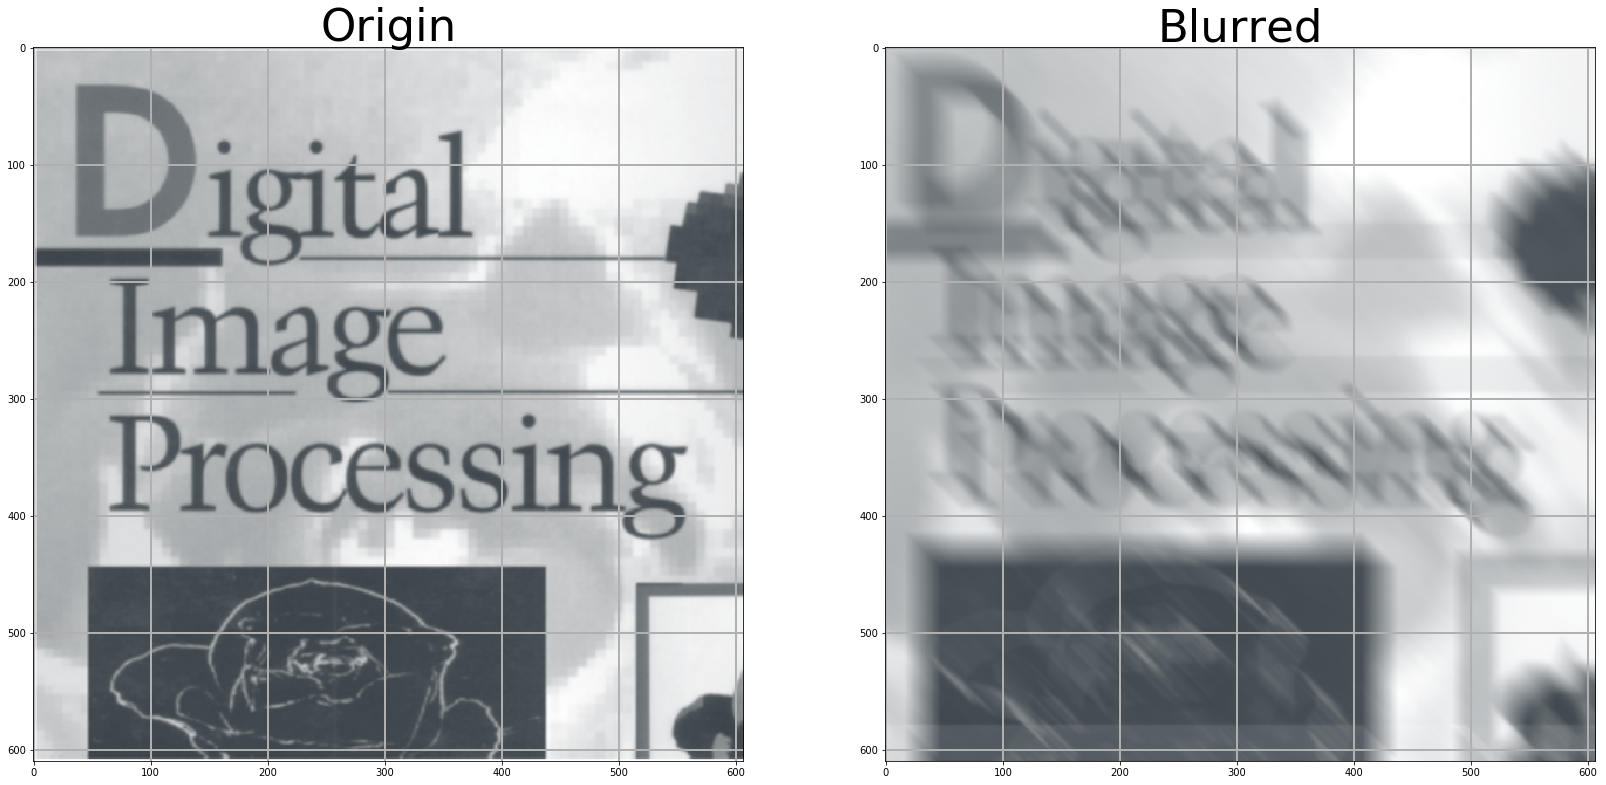

In [66]:
img = cv2.imread('cover.PNG')
plt.figure(figsize=(28,20))
plt.subplot(1, 2, 1)
plt.title('Origin', fontsize=45)
plt.grid(True, linewidth=2)
plt.imshow(img)

size = int(img.shape[0]/10)

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
for i in range(size//2, size):
    kernel_motion_blur[i][i] = 1
kernel_motion_blur = kernel_motion_blur / (size//2)

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)


plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Blurred', fontsize=45)
plt.grid(True, linewidth=2)

plt.show()

## Visualize the filter
* The shape of the window will be size/10 (about 68)
* Only show the 5x5 window in the center.

In [67]:
center = size//2
pd.DataFrame(kernel_motion_blur).iloc[center-2:center+3, center-2:center+3]

28   29        30        31        32
28  0.0  0.0  0.000000  0.000000  0.000000
29  0.0  0.0  0.000000  0.000000  0.000000
30  0.0  0.0  0.033333  0.000000  0.000000
31  0.0  0.0  0.000000  0.033333  0.000000
32  0.0  0.0  0.000000  0.000000  0.033333

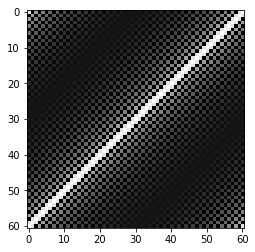

In [68]:
mask = kernel_motion_blur
f = np.fft.fft2(mask)
f1shift = np.fft.fftshift(f)
m1 = np.log(np.abs(f1shift))
plt.imshow(m1,'gray')


## Other testcase

In [70]:
testcase = ['Q1.tif', 'Q2.tif', 'Q3.tif', 'Q4.tif']

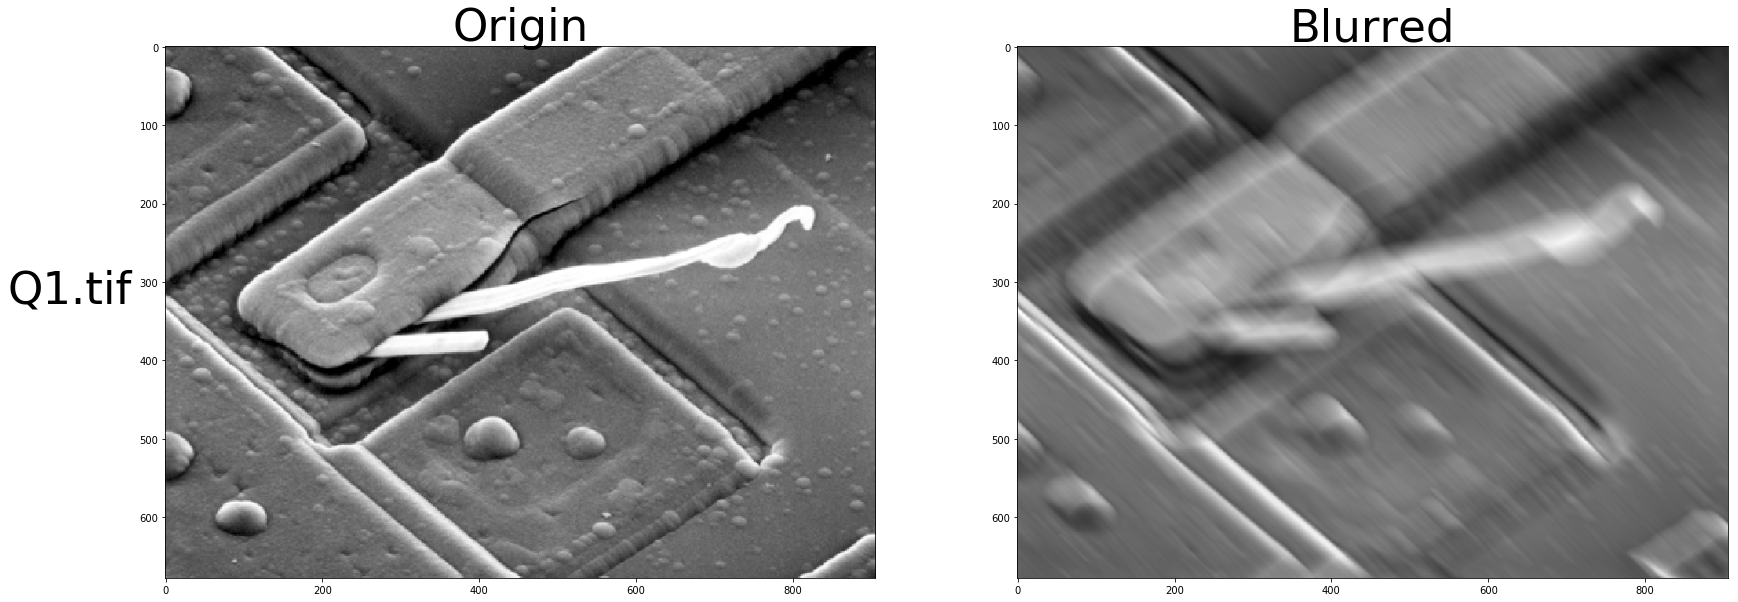

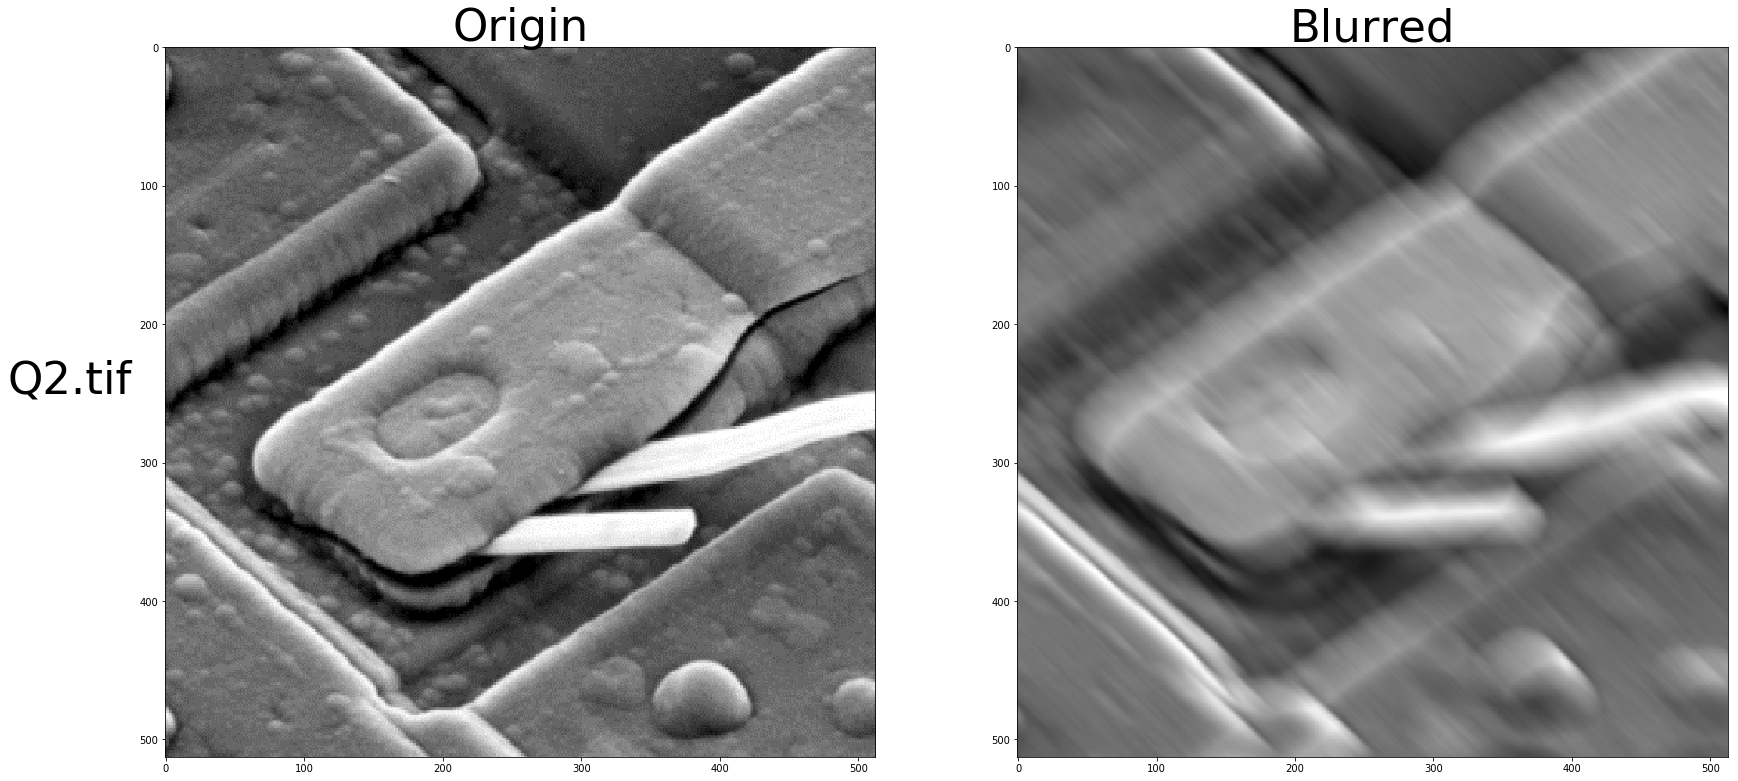

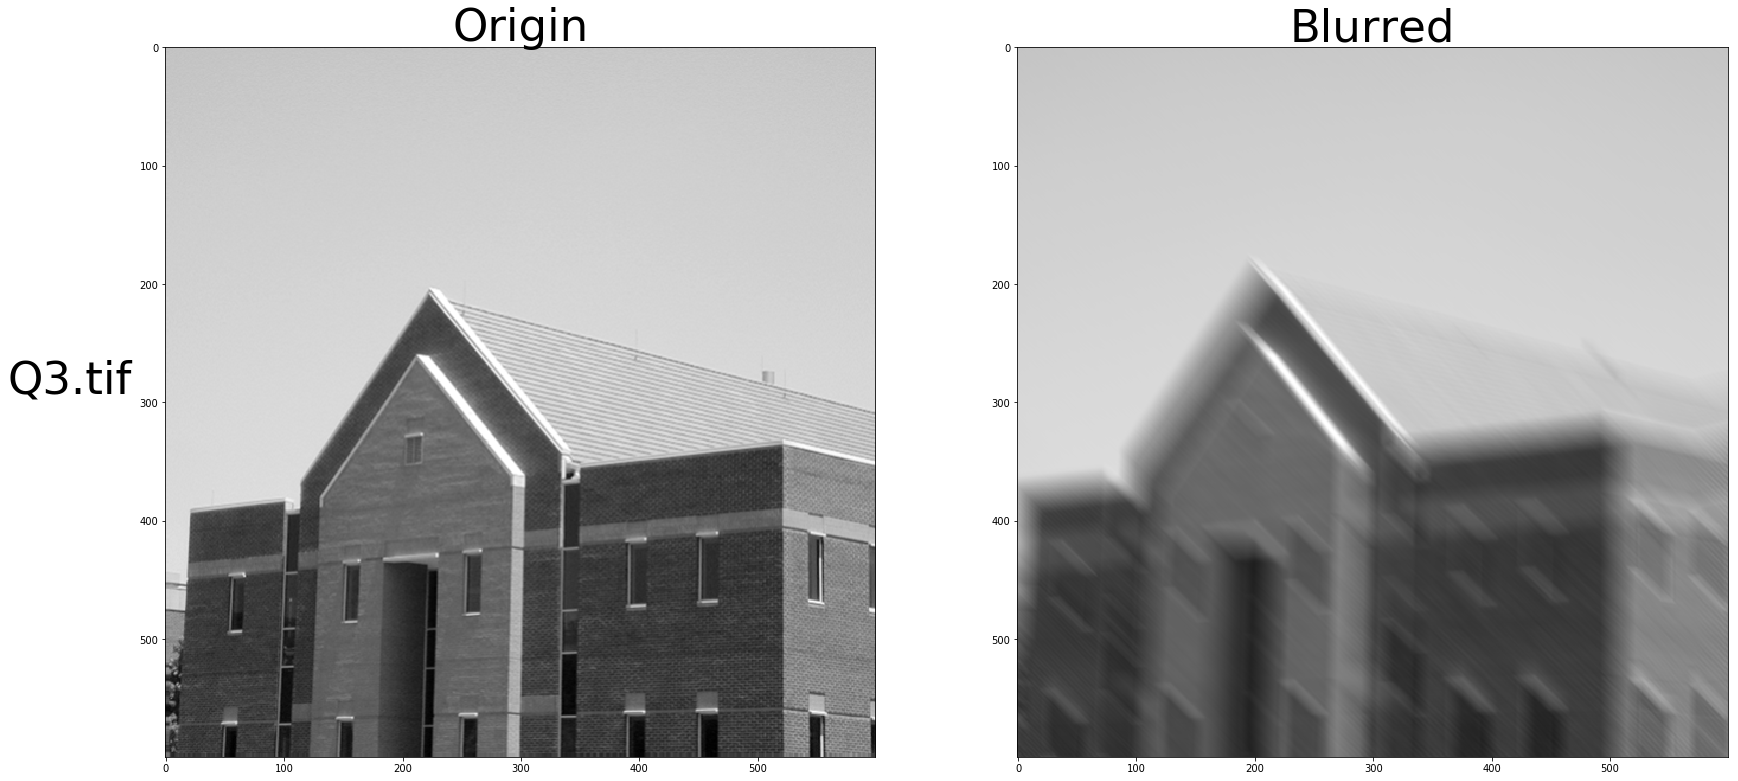

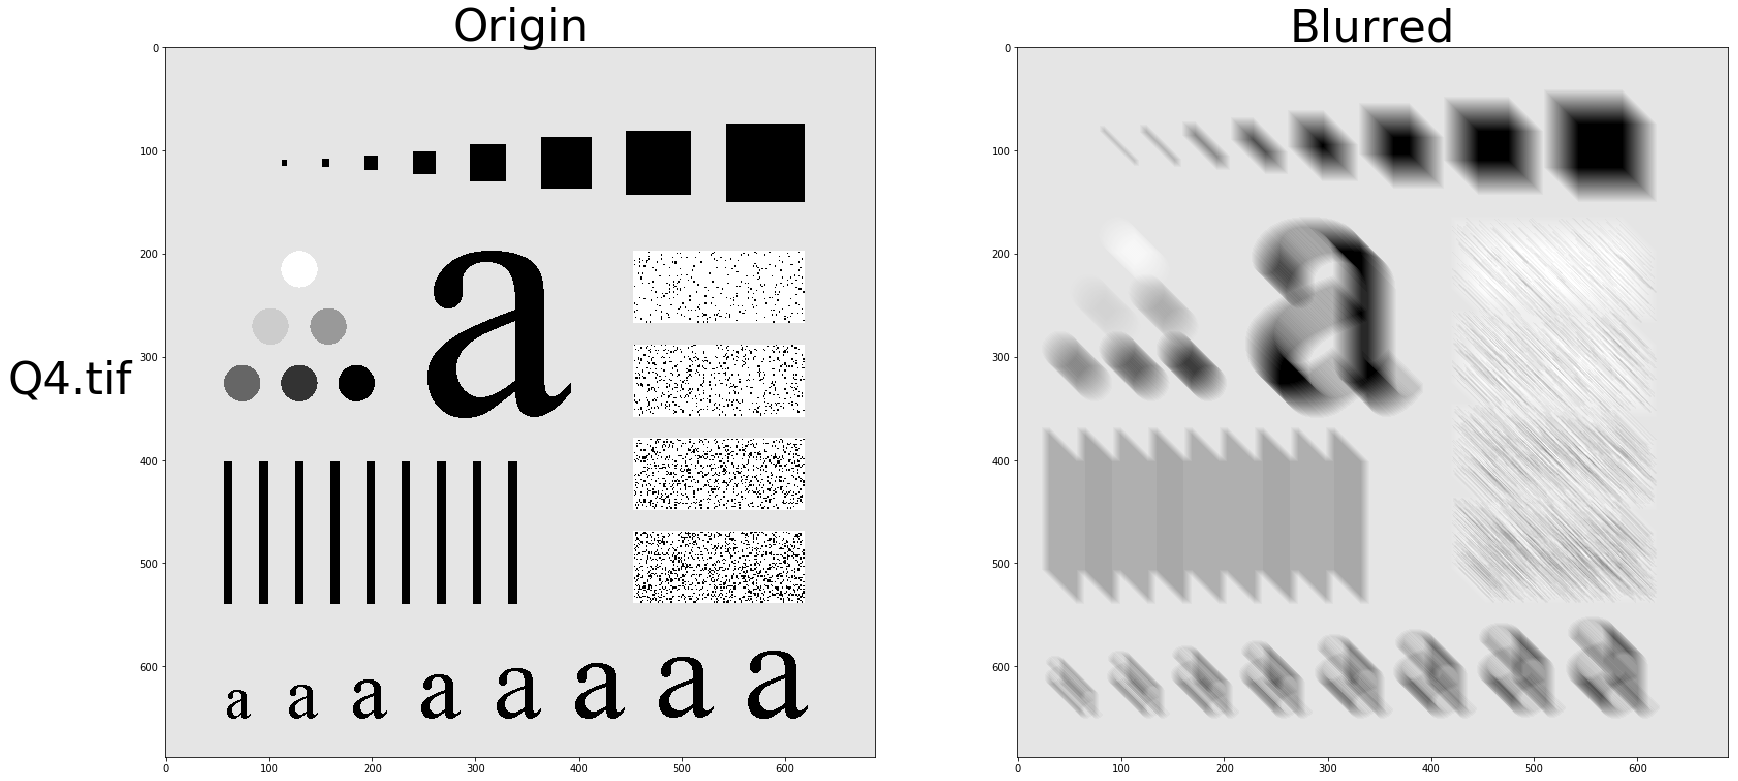

In [71]:
for idx, imgName in enumerate(testcase):

    img = cv2.imread(imgName)
    plt.figure(figsize=(28, 20*len(testcase)))
    plt.subplot(idx+1, 2, 1)
    plt.title('Origin', fontsize=45)
    #plt.grid(True, linewidth=2)
    plt.ylabel(imgName, fontsize=45, labelpad=70, rotation=0)
    plt.imshow(img)

    size = int(img.shape[0]/10)

    # generating the kernel
    kernel_motion_blur = np.zeros((size, size))
    for i in range(size//2, size):
        kernel_motion_blur[i][i] = 1
    kernel_motion_blur = kernel_motion_blur / (size//2)

    # applying the kernel to the input image
    output = cv2.filter2D(img, -1, kernel_motion_blur)


    plt.subplot(idx+1, 2, 2)
    plt.imshow(output)
    plt.title('Blurred', fontsize=45)
    #plt.grid(True, linewidth=2)

plt.show()

## 1. Frequency Filtering

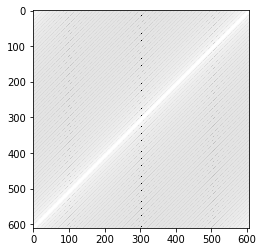

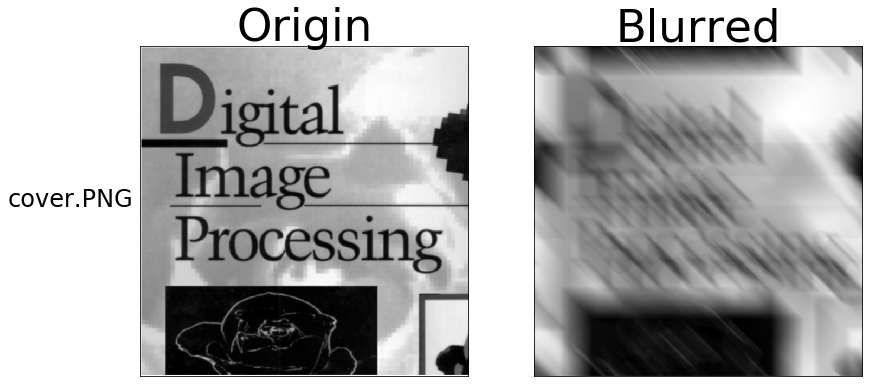

In [146]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgName = 'cover.PNG'
img = cv2.imread(imgName,0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

kernel_motion_blur = np.zeros((img.shape[0], img.shape[1]))
masksize = kernel_motion_blur.shape[0]

for i in range (0, int(img.shape[0]*0.1)):
    kernel_motion_blur[i][i] = 255


mask = kernel_motion_blur
f1 = np.fft.fft2(mask)
f1shift = np.fft.fftshift(f1)
m1 = np.log(np.abs(f1shift))
m1.shape

f_ishift = np.fft.ifftshift(f*f1)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.imshow(m1,'gray')
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Origin',fontsize=45), plt.xticks([]), plt.yticks([])
plt.ylabel(imgName, fontsize=24, labelpad=70, rotation=0)
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Blurred',fontsize=45), plt.xticks([]), plt.yticks([])

plt.show()

### other testcase

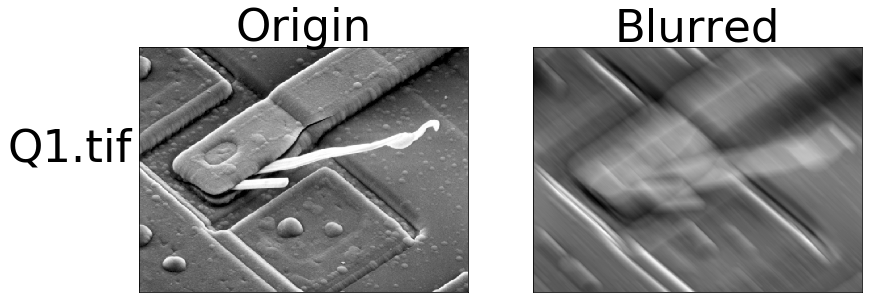

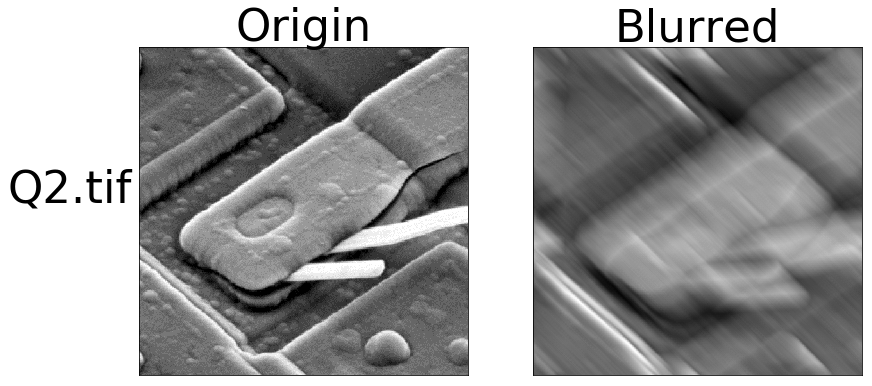

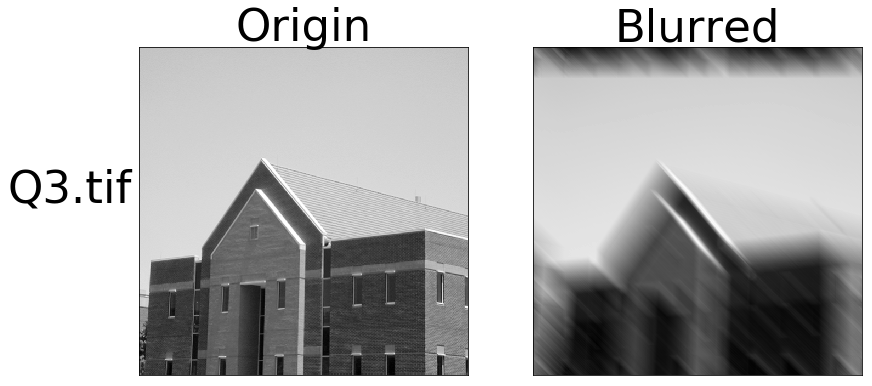

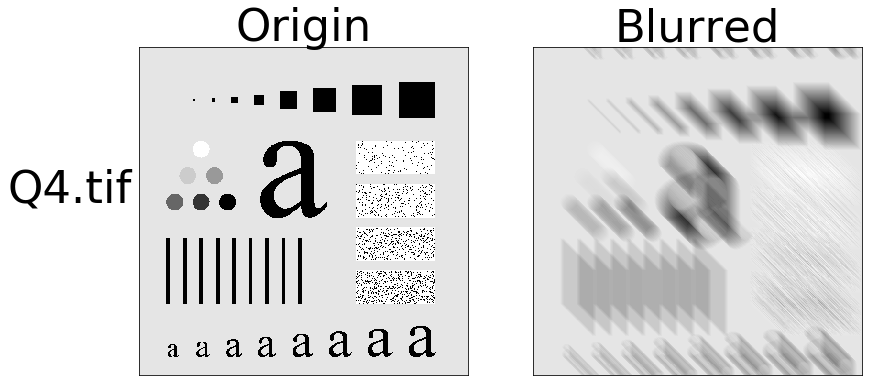

In [91]:
testcase = ['Q1.tif', 'Q2.tif', 'Q3.tif', 'Q4.tif']
for idx, imgName in enumerate(testcase):

    # Read image and transform to frequency domain
    img = cv2.imread(imgName,0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # get freqency filter
    kernel_motion_blur = np.zeros((img.shape[0], img.shape[1]))
    masksize = kernel_motion_blur.shape[0]

    for i in range (0, int(img.shape[0]*0.1)):
        kernel_motion_blur[i][i] = 255
    

    mask = kernel_motion_blur
    f1 = np.fft.fft2(mask)
    f1shift = np.fft.fftshift(f1)
   
    f_ishift = np.fft.ifftshift(f*f1)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)


    plt.figure(figsize=(20,20))
    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.ylabel(imgName, fontsize=45, labelpad=70, rotation=0)
    plt.title('Origin', fontsize=45), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
    plt.title('Blurred', fontsize=45), plt.xticks([]), plt.yticks([])
    plt.show()



## 2. Get H(u, v) by Sampling

In [186]:
imgName = '5.png'
img = cv2.imread(imgName,0)
f = np.fft.fft2(img)

### Real & Imaginary filter after DFT

In [187]:
planes = [np.zeros((img.shape[0], img.shape[1])), np.zeros((img.shape[0], img.shape[1]))]
offset = img.shape[0] // 2 + img.shape[1] // 2;

T = 1
a = 0.05

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        planes[0][i][j] = T * np.sinc(np.pi * a*(i + j - offset)) * np.cos(np.pi * a* (i + j - offset))
        planes[1][i][j] = T * -np.sinc(np.pi * a * (i + j - offset)) * np.sin(np.pi * a * (i + j - offset)) 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f88965f7b70>,
 <matplotlib.image.AxesImage at 0x7f88965ca0f0>)

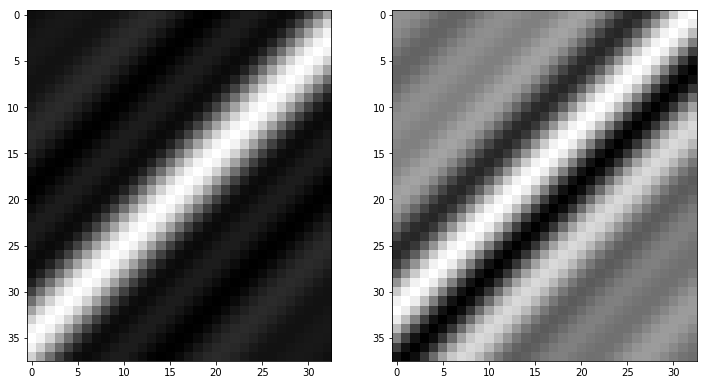

In [188]:
plt.figure(figsize=(12,10))
plt.subplot(121), plt.imshow(planes[0],'gray')
plt.subplot(122), plt.imshow(planes[1],'gray')

### Merge 2 part into 1 magnitude filter

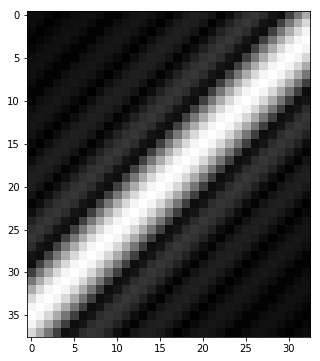

In [189]:
plt.figure(figsize=(8,6))
mask = np.absolute(planes[0]+planes[1]*1j)
plt.imshow(mask,'gray')

### Result

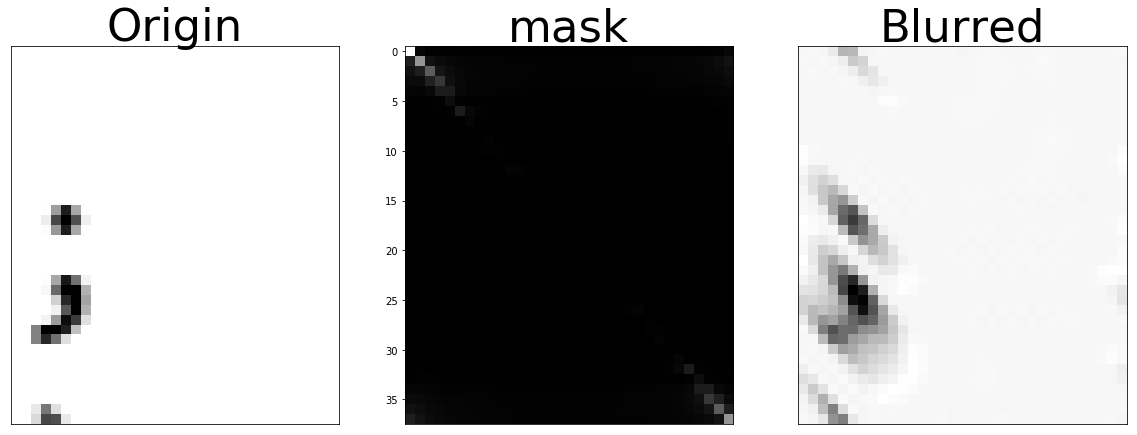

In [194]:
RE, IM = planes[0], planes[1]

mask = np.absolute(RE+IM*1j)
mask = np.fft.fftshift(mask)

img_back = np.fft.ifft2(f*mask)
img_back = np.abs(img_back)

mask_back = np.fft.ifft2(mask)
mask_back = np.abs(mask_back)


plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Origin', fontsize=45), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask_back, cmap = 'gray')
plt.title('mask', fontsize=45), plt.xticks([]), plt.yticks
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Blurred', fontsize=45), plt.xticks([]), plt.yticks([])
plt.show()


### other testcase

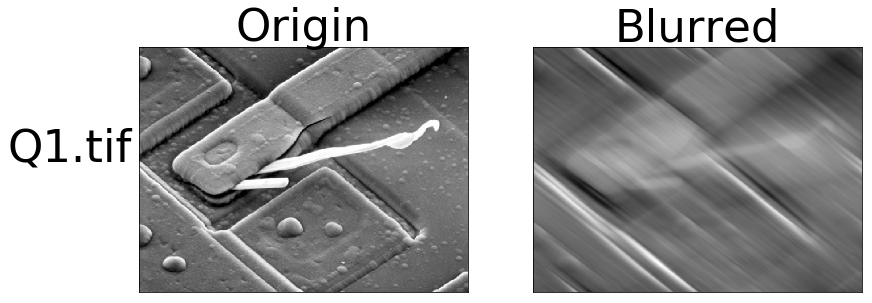

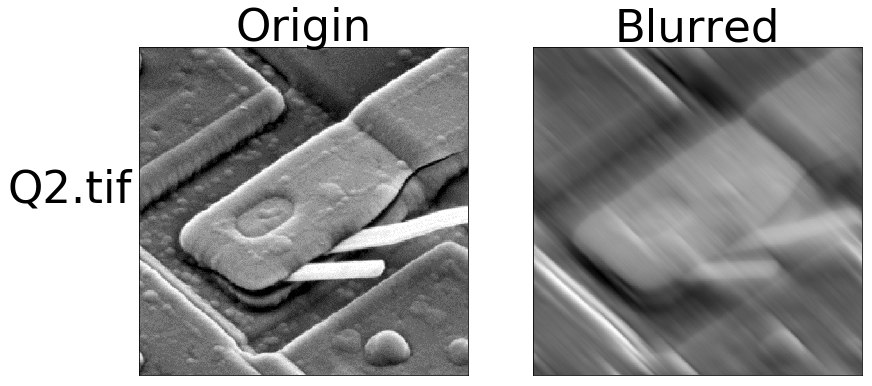

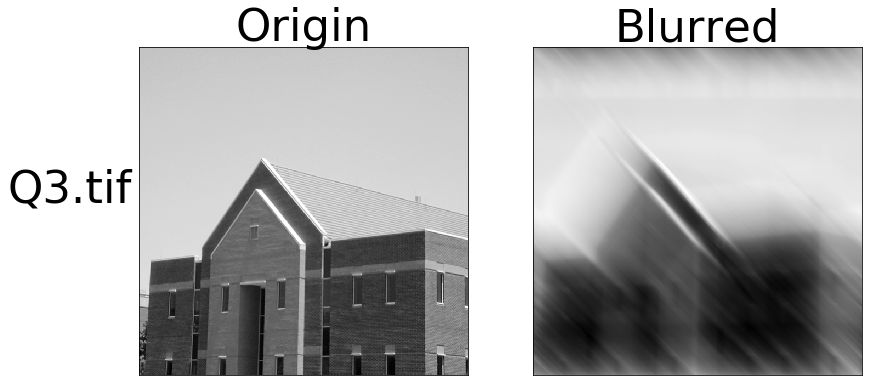

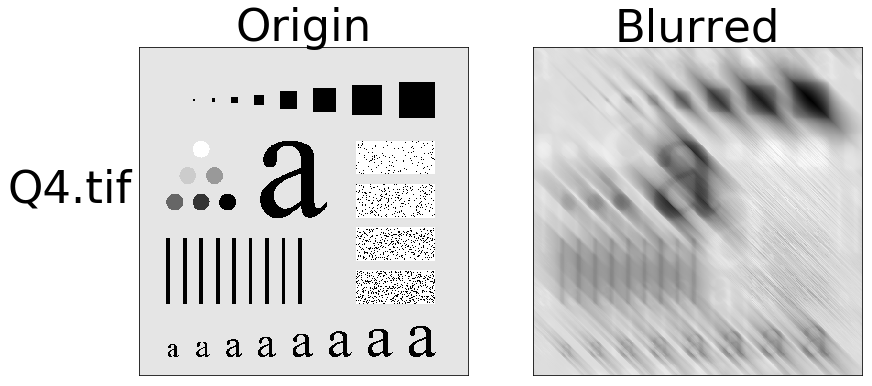

In [144]:
testcase = ['Q1.tif', 'Q2.tif', 'Q3.tif', 'Q4.tif']
for idx, imgName in enumerate(testcase):

    # Read image and transform to frequency domain
    img = cv2.imread(imgName,0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # get freqency filter by sampling
    planes = [np.zeros((img.shape[0], img.shape[1])), np.zeros((img.shape[0], img.shape[1]))]
    offset = img.shape[0] // 2 + img.shape[1] // 2;
    T = 1
    a = 0.05
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            planes[0][i][j] = T * np.sinc(np.pi * a*(i + j - offset)) * np.cos(np.pi * a* (i + j - offset))
            planes[1][i][j] = T * -np.sinc(np.pi * a * (i + j - offset)) * np.sin(np.pi * a * (i + j - offset)) 
    
    # Merge Real & Imaginary Part 
    RE, IM = planes[0], planes[1]
    mask = np.absolute(RE+IM*1j)
    mask = np.fft.fftshift(mask)

    img_back = np.fft.ifft2(f*mask)
    img_back = np.abs(img_back)


    plt.figure(figsize=(20,20))
    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.ylabel(imgName, fontsize=45, labelpad=70, rotation=0)
    plt.title('Origin', fontsize=45), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
    plt.title('Blurred', fontsize=45), plt.xticks([]), plt.yticks([])
    plt.show()

